In [51]:
from frap_analyzer import *
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import json
import os

In [52]:
path = os.getcwd()
names = [name for name in os.listdir(path=f'{path}/data_in')]

print(names)

['280322-CADC-FAF.lif', '090522_FAF_SAS_FRAP.lif', '160322-CrACr.lif']


In [53]:
lif_file_name = 'data_in/160322-CrACr.lif' #data_in\090522_FAF_SAS_FRAP.lif
lif_files = LifFile(f'./{lif_file_name}')
imf_list = [i for i in lif_files.get_iter_image()]

run_name = 'FRAP_009'

data1 = dataLoader(imf_list)



with open('/home/daniil/codebase/frap/params_160322_CrACr.pickle', 'rb') as pickl_file:
    params = pickle.load(pickl_file)



In [68]:
256/data1.data[8].scale_n[1]

42.93660109803922

In [73]:
xy_scale = 1/data1.data[8].scale_n[1]
xy_scale

0.1677210980392157

In [54]:

params['FRAP_009']['min_norm']
print('hello')

hello


In [55]:
def singular_process(name, parameters):
#try:
    timeline = data1.getTimeline(name)
    intensity_reading = data1.getMeanIntensity(parameters, name)
#except:
    #timeline = [0]
    #intensity_reading = [0]
    return [timeline, intensity_reading]

In [5]:
res1 = singular_process('FRAP 009', params)

0.13394535815308525
0.1409520260618687
0.1485628144108132
0.15507263560245488
0.15772624875082575
0.16375051519616976
0.16924970499726166
0.17126532179293916
0.17705810283597848
0.18063201160814601
0.18496812841229243
0.1889203182077384
0.19318868318682
0.20575100075091607
0.20265700073962406
0.20583569053224704
0.2079134131675672
0.21200675259856477
0.21679454823647648
0.21750029641423463
0.227680008130219
0.2355166358960461
0.2443413111107347
0.2548202600540886
0.2610703659163152
0.27041447178983385
0.2832873185521435
0.28381804118181764
0.28618935505908527
0.2947994828277353
0.3018569646053174
0.3125617529655539
0.31457736976123124
0.3186142493380082
0.3224309354833246
0.3385050559799454
0.342846818769514
0.34941874580079835
0.3519763771969941
0.36394022030635115
0.3663849319941056
0.3678528882038427
0.370721048798252
0.3731093006317857
0.3813242094208913
0.38733153790996916
0.38633784447568564
0.3890309795220109
0.3945075853814146
0.397641107290661
0.4024458408848389
0.404038008773

/home/daniil/miniconda3/envs/frap/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/daniil/miniconda3/envs/frap/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/miniconda3/envs/frap/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/daniil/miniconda3/envs/frap/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/daniil/miniconda3/envs/frap/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/daniil/miniconda3/envs/frap/lib/python3.9/site-packages/numpy/core/_method

[]

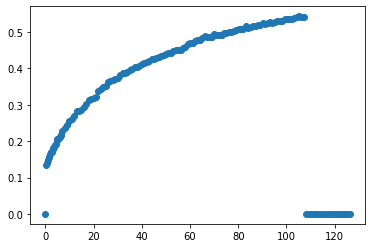

In [7]:
plt.scatter(res1[0], res1[1])
plt.plot()

In [57]:
img1 = np.array(data1.getFrameInRun(run_name)[10])
load_main_img1 = MainShapeAnalyzer(img1)
load_sec_img1 = SecondaryShapeAnalyzer(load_main_img1.displayMaskedImg(), img1)

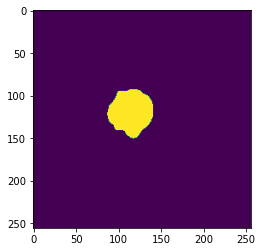

In [ ]:
plt.imshow(load_main_img1.binary)
plt.show()

In [46]:
with open('/home/daniil/codebase/frap/results_160322_CrACr.json', 'r') as json_f:
    results_dict = json.load(json_f)

with open('/home/daniil/codebase/frap/params_160322_CrACr.pickle', 'rb') as pickl_file:
    params = pickle.load(pickl_file)


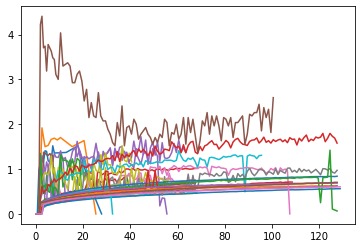

In [47]:
for run in results_dict.keys():
    run_load = results_dict[run]
    try:
        plt.plot(run_load[0], run_load[1])
    except:
        continue
plt.show()

In [77]:
import glob
from scipy import special
from scipy.optimize import curve_fit

#can be made into separate module, called function or something. So it will be easier to manage

def d2_eqn_diffusion(t, tau):
    return np.exp(-tau/(t*2))*(special.iv(0,tau/(t*2))+special.iv(1,tau/(t*2)))

def d1_eqn_diffusion(t, tau):
    return 1-special.erf(np.sqrt(tau/t))+np.sqrt(t/(np.pi*tau))*(1-np.exp(-tau/t))

def d3_eqn_diffusion(t, tau):
    #print(tau)
    #print(t)
    return 1-special.erf(np.sqrt(tau/t))+np.sqrt(t/(np.pi*tau))*(3-np.exp(-(tau/t)))+2*np.sqrt((t**3/(np.pi*tau**3)))*(np.exp(-tau/t)-1)

def exponential_eqn_simple(t, tau, A):
    return A*(1-np.exp(-t/tau))

def get_r2(ydat, xdata, popt, function_fit):
    residauals = ydat-function_fit(xdata, *popt)
    ss_res = np.sum(np.nan_to_num(residauals)**2)
    ss_tot = np.sum((ydat-np.mean(ydat))**2)
    return 1-(ss_res/ss_tot)

functions = {
    1 : d1_eqn_diffusion,
    2 : d2_eqn_diffusion,
    3 : d3_eqn_diffusion,
    4 : exponential_eqn_simple
}


class CurveAnalysis():

    functions = {
    1 : d1_eqn_diffusion,
    2 : d2_eqn_diffusion,
    3 : d3_eqn_diffusion,
    4 : exponential_eqn_simple
}


    def __init__(self, plotdata, function_type):
        self.int_values_list = np.array(plotdata[1])
        self.time_values = np.array(plotdata[0])
        self.first_zero = [index for index, value in enumerate(self.time_values) if value <= 0]
        self.function_t = functions[int(function_type)]
        self.nonzerotime = self.time_values[self.first_zero[-1]:]+1e9


    def fitEquation(self):
        popt, pcov = curve_fit(self.function_t , self.time_values[self.first_zero[-1]:] , self.int_values_list[self.first_zero[-1]:])
        return popt
    
    def fitEquation_nz(self):
        popt, pcov = curve_fit(self.function_t , self.nonzerotime , self.int_values_list[self.first_zero[-1]:])
        return popt
    
    def returnR2(self):
        #print(self.fitEquation())
        
        r2_value = get_r2(self.int_values_list[self.first_zero[-1]:], self.time_values[self.first_zero[-1]:], self.fitEquation(), self.function_t)
        return r2_value

    def returnR2_nz(self):
        #print(self.fitEquation())
        
        r2_value = get_r2(self.int_values_list[self.first_zero[-1]:], self.nonzerotime, self.fitEquation_nz(), self.function_t)
        return r2_value

    def plotCurve(self):
        plt.scatter(self.time_values[self.first_zero[-1]:],self.int_values_list[self.first_zero[-1]:])

In [50]:
cur_liz1 = CurveAnalysis(results_dict['FRAP_002'], 3)
cur_liz1.returnR2()

<ipython-input-49-b9736445f1eb>:16: RuntimeWarning: divide by zero encountered in true_divide
  return 1-special.erf(np.sqrt(tau/t))+np.sqrt(t/(np.pi*tau))*(3-np.exp(-(tau/t)))+2*np.sqrt((t**3/(np.pi*tau**3)))*(np.exp(-tau/t)-1)


0.8998470734602205

In [11]:
cur_liz1.fitEquation()

<ipython-input-9-c9c8fd3aa369>:15: RuntimeWarning: divide by zero encountered in true_divide
  return 1-special.erf(np.sqrt(tau/t))+np.sqrt(t/(np.pi*tau))*(3-np.exp(-(tau/t)))+2*np.sqrt((t**3/(np.pi*tau**3)))*(np.exp(-tau/t)-1)


array([259.83814568])

In [71]:
params

{'FRAP': {'min_norm': 49.0,
  'mean_norm': 123.0,
  'roi_radius': 0.0,
  'gaus_mix_model_main': BayesianGaussianMixture(n_components=2, random_state=42)},
 'FRAP_001': {'min_norm': 35.0,
  'mean_norm': 116.0,
  'roi_radius': 0.0,
  'gaus_mix_model_main': BayesianGaussianMixture(n_components=2, random_state=42)},
 'FRAP_002': {'min_norm': 28.0,
  'mean_norm': 122.0,
  'roi_radius': 17.0,
  'gaus_mix_model_main': BayesianGaussianMixture(n_components=2, random_state=42)},
 'FRAP_003': {'min_norm': 19.0,
  'mean_norm': 101.0,
  'roi_radius': 13.0,
  'gaus_mix_model_main': BayesianGaussianMixture(n_components=2, random_state=42)},
 'FRAP_004': {'min_norm': 24.0,
  'mean_norm': 129.0,
  'roi_radius': 5.0,
  'gaus_mix_model_main': BayesianGaussianMixture(n_components=2, random_state=42)},
 'FRAP_005': {'min_norm': 26.0,
  'mean_norm': 129.0,
  'roi_radius': 21.0,
  'gaus_mix_model_main': BayesianGaussianMixture(n_components=2, random_state=42)},
 'FRAP_006': {'min_norm': 23.0,
  'mean_norm': 

[4.75403223]  um^2s^-1
[9.11436456]  um^2s^-1
[9.114406]  um^2s^-1
[25.31751058]  um^2s^-1
[59.52395211]  um^2s^-1
[42.78633801]  um^2s^-1
[45.00862381]  um^2s^-1


<ipython-input-77-2657e308550f>:16: RuntimeWarning: divide by zero encountered in true_divide
  return 1-special.erf(np.sqrt(tau/t))+np.sqrt(t/(np.pi*tau))*(3-np.exp(-(tau/t)))+2*np.sqrt((t**3/(np.pi*tau**3)))*(np.exp(-tau/t)-1)
<ipython-input-77-2657e308550f>:16: RuntimeWarning: invalid value encountered in sqrt
  return 1-special.erf(np.sqrt(tau/t))+np.sqrt(t/(np.pi*tau))*(3-np.exp(-(tau/t)))+2*np.sqrt((t**3/(np.pi*tau**3)))*(np.exp(-tau/t)-1)
<ipython-input-77-2657e308550f>:16: RuntimeWarning: invalid value encountered in multiply
  return 1-special.erf(np.sqrt(tau/t))+np.sqrt(t/(np.pi*tau))*(3-np.exp(-(tau/t)))+2*np.sqrt((t**3/(np.pi*tau**3)))*(np.exp(-tau/t)-1)


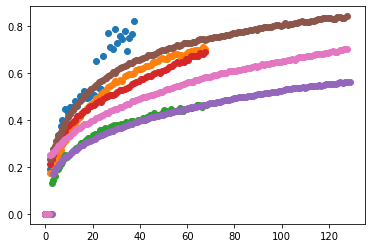

In [79]:
r2_results = {}
for name, data in results_dict.items():
    dataent = CurveAnalysis(data, 3)
    r2_results[name] = dataent.returnR2()
    if r2_results[name] > 0.90:
        dataent.plotCurve()
        print((params[name]['roi_radius']*xy_scale)**2/dataent.fitEquation_nz(), ' um^2s^-1')
    else:
        continue

plt.show()


In [41]:
r2_results

{'FRAP_001': 0.2832745821136292,
 'FRAP': 0.06059420139873262,
 'FRAP_002': 0.8998470734602205,
 'FRAP_003': 0.9284727625294508,
 'FRAP_006': 0.050492596672713,
 'FRAP_004': -0.5508592599094182,
 'FRAP_005': 0.863645350493605,
 'FRAP_007': 0.9842523290250889,
 'FRAP_010': 0.7844138420390396,
 'FRAP_011': 0.9109305321652301,
 'FRAP_008': 0.8189651455776866,
 'FRAP_009': 0.815820649938245,
 'FRAP_013': 0.5671262348983683,
 'FRAP_012': 0.7368159344356211,
 'FRAP_014': 0.16160082357855465,
 'FRAP_015': 0.9432347733673664,
 'FRAP_016': 0.8694731614665246,
 'FRAP_017': 0.8592020506828166,
 'FRAP_021': 0.514289141068022,
 'FRAP_022': 0.4875086307598048,
 'FRAP_020': 0.915695156895057,
 'FRAP_018': 0.7187094548552587,
 'FRAP_024': 0.21598362035230212,
 'FRAP_023': -0.6103132803272686,
 'FRAP_019': 0.8195524057361423,
 'FRAP_026': -2.5027993852317696,
 'FRAP_028': 0.6917496967209071,
 'FRAP_027': 0.7002089888199745,
 'FRAP_029': 0.6996496191473854,
 'FRAP_031': 0.5653179159983828,
 'FRAP_030': 